# 📝 Numerical Data Types

Numerical values can be stored in computers as variables in a variety of formats.

**Question** Why might we want to have different number formats?

There are a lot of numerical values that can be expressed. We want to store and conduct computation with numbers in a standard and simple format.

Consider calculating the area of a circle. Most of the time you can get away with low precision approximation of $\pi$ as 3.14. Computers do the same thing.

Cost of computation, random access memory (RAM) utilization, and required hard drive space is dependent on the precision which the data is saved.

## Importing Packages

Python has many built-in functions; however, its real power comes from packages.  

```{tip}
Many packages are listed on the [Python Package Index](https://pypi.org/), and can be installed by typing `pip install <package_name>` in the command line when you have installed Python on your own computer. All of the packages you need for this course are pre-installed on the JupyterHub. 

Packages can be imported using `import <package_name> as <name>`.
```

We will import [numpy](https://numpy.org/) - NumPy is the fundamental package for scientific computing in Python.

```{note}
You can read additional information on the <a href url="https://numpy.org/doc/stable/user/whatisnumpy.html">NumPy Website</a>
```

In [1]:
import numpy as np


```{tip}
Many packages have standard naming conventions. It is good practice to use these. For example, NumPy is commonly imported as np. 
```

## Integer

Integers are zero, positive, or negative numbers
* Python and NumPy does its best to automatically choose or even adjust the datatype automatically.

```{note}
A Python integer is more than just an integer. There is a bunch of other information saved with the integer value in python -- this is why python (and scripting languages in general) are easier to use than low-level languages, but they are slightly less efficient. 
    
In most cases the efficiency of python is good enough!
```

In [2]:
a = 1


In [3]:
type(a)


int

In [4]:
import sys

sys.getsizeof(a)


28

The size allocated to the variable a is bigger than is actually required because Python allocates more space for additional utility.

Depending on your central processing unit (CPU) numbers might have a different size in memory. Older computers have 32-bit processors, this means the largest expressible number is $2^{31}-1$, if you have a 64-bit processor it is $2^{63}-1$.

In [5]:
sys.maxsize


9223372036854775807

In [6]:
2**63


9223372036854775808

Let's try a bigger number:

In [7]:
2**102


5070602400912917605986812821504

Python will allocate more space and automatically add additional bytes to accommodate larger numbers

In [8]:
sys.getsizeof(0)  # largest  0-digit number


24

In [9]:
sys.getsizeof(1)  # smallest 1-digit number


28

In [10]:
sys.getsizeof(2**30 - 1)  # largest  1-digit number


28

In [11]:
sys.getsizeof(2**30)  # smallest 2-digit number


32

In [12]:
sys.getsizeof(2**60 - 1)  # largest  2-digit number


32

## Unsigned Integer

In [13]:
a = np.array(3, dtype=np.uint8)
sys.getsizeof(a)


97

**Question** Why is this so big? it is just an unsigned 8-bit integer?

It is because we saved the data as an array. An array has additional information that is convenient in certain situations, but making a variable an array adds weight to the object.

The raw object can be obtained using a built-in method `<obj>.nbytes`.

```{tip}
You can view a list of built-in methods by writing `<obj>.` and pressing `tab`
```

In [14]:
a.nbytes


1

Now we see that it is one Byte or 8 bits.

### Use Case: Images

Most images are saved as three-dimensional objects. The shape of the array is [x,y, color]. 

Specifically, images are defined by the [x,y] pixel position, and the color is represented by 4 channels:<br>
R - Red <br>
G - Green <br>
B - Blue <br>
A - alpha (transparency)

To define a 3-dimensional array, we type the following command:

In [15]:
a = np.array(3, dtype=np.uint32)
a.nbytes


4

Let's load an image of the Drexel dragon.

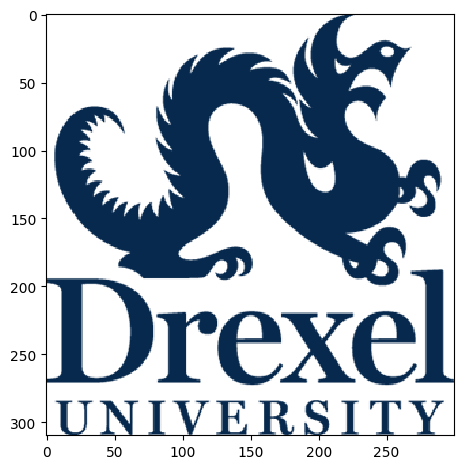

In [16]:
from skimage.io import imread, imshow

drexel_dragon = imread("./figs/Drexel_Logo.png")
imshow(drexel_dragon)


Let's view the shape of the variable holding the image information.

In [17]:
drexel_dragon.shape


(310, 300, 4)

Images are defined by the x,y pixel position and 4 channels for the color:<br>
R - Red <br>
G - Green <br>
B - Blue <br>
A - alpha (transparency)

Let's view the datatype of `drexel_dragon`.

In [18]:
drexel_dragon.dtype


dtype('uint8')

Why is `uint8` good for showing images?

Recall that colors are defined as:<br>

R - Red <br>
G - Green <br>
B - Blue <br>
A - alpha (transparency) <br>

Each of the red, green, and blue channels are commonly defined as values from 0-255 while transparency is on a scale of 1-100. Let's see this:

```{tip}
if you want to execute a built in method you need to call the method with `{obj}.{method}()`
```

In [19]:
drexel_dragon.max(), drexel_dragon.min()


(255, 0)

Let's validate that 255 is definable by 8 bits:

In [20]:
2**8


256

## Floating Point Numbers

Engineers always need to be aware of how exact a number is. Sometimes, it is necessary to describe numbers very exactly with many values after the decimal point. For such high precision to be carried in calculations or shown, computers generally and Python specifically requires using a floating point number.

How is a floating point number described?

Let's take an example of a 32-bit floating point number.

![](./figs/Float_example.png)

For 32-bit floating point numbers:
* 1-bit controls the sign(s), $S$
* 8-bits control the exponent, $e$
* 23-bits set the fraction, $M$

$$ value = S * 1.M * 2^{e-127}$$

In [21]:
a = np.array(np.pi, np.float32)


In [22]:
print(a.astype("str"))


3.1415927


## Complex Numbers

Sometimes in mathematics or engineering, it is useful to have a number system that operates in another dimension besides real space. 

A complex number is an element of a number system that extends the real numbers with a specific element denoted $i$, called the imaginary unit and satisfying the equation $\sqrt(i) = −1$; every complex number can be expressed in the form $a + bi$, where a and b are real numbers. 

Complex numbers help solve polynomial functions, which has applications in:
1. Signal processing
2. Number theory
3. Electricity and Magnetism
4. Fluid dynamics
5. Control theory

In Python, the imaginary part is actually indicated with a `j` instead of an `i` for historical reasons.

In [23]:
a = 1.5
b = 0.8
c = a + b * 1j
print(c)


(1.5+0.8j)


In [24]:
type(c)


complex

We can use numpy to extract the real and imaginary components

In [25]:
print(np.real(c))
print(np.imag(c))


1.5
0.8
